In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

# gradient 

## functions

In [0]:
# predicting with gb algorithm
def gb_predict(x, trees_list, coef_list, eta):
    # initializing with nulls, all trees from trees_list will be add-on
    # every tree has its weight
    return np.array(
        [sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
        for x in x]
        )

# mse function
def mse(y_true, y_pred):
    return (sum((y_true - y_pred)**2)) / len(y_true)

# applying l2 loss, derivative:
## L(y,z) = (y-z)**2 -> L'(y,z) = 2*(y-z), 2 is dropped
def bias(y, z):
    return (y - z) #!!!!

# gb fit function
def gb_fit(n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta):

    trees, train_errors, test_errors = [], [], []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # initializing the boost with algo returning null
        if len(trees) == 0:
            tree.fit(x_train, y_train)
            train_errors.append(mse(y_train, gb_predict(x_train, trees, coefs, eta)))
            test_errors.append(mse(y_test, gb_predict(x_test, trees, coefs, eta)))

        else:
            target = gb_predict(x_train, trees, coefs, eta)
            # y for the next steps is the remainder of the error
            tree.fit(x_train, bias(y_train, target))
            
            train_errors.append(mse(y_train, gb_predict(x_train, trees, coefs, eta)))
            test_errors.append(mse(y_test, gb_predict(x_test, trees, coefs, eta)))

        trees.append(tree)

    return trees, train_errors, test_errors


# evaluating model
def evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta):

    train_prediction = gb_predict(x_train, trees, coefs, eta)

    print(
        f'error @train for the model with trees = {n_trees}, depth = {max_depth} \
        step = {eta} equal to: {mse(y_train, train_prediction)}'
    )

    test_prediction = gb_predict(x_test, trees, coefs, eta)

    print(
        f'error @test for the model with trees = {n_trees}, depth = {max_depth} \
        step = {eta} equal to: {mse(y_test, test_prediction)}'
    )

    
# plotting error
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('iter #')
    plt.ylabel('mse')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

## data upload

In [0]:
x, y = load_diabetes(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## build & predict

error @train for the model with trees = 10, depth = 3         step = 1 equal to: 955.8914642367323
error @test for the model with trees = 10, depth = 3         step = 1 equal to: 5870.889500170243


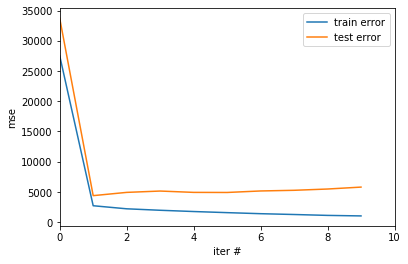

In [0]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 3
eta = 1

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)

error @train for the model with trees = 100, depth = 3         step = 1 equal to: 1.8928293499392033
error @test for the model with trees = 100, depth = 3         step = 1 equal to: 5288.89482927867


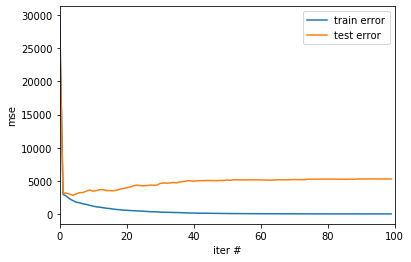

In [0]:
n_trees = 100
coefs = [1] * n_trees
max_depth = 3
eta = 1

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)

error @train for the model with trees = 100, depth = 3         step = 0.1 equal to: 928.2400354137358
error @test for the model with trees = 100, depth = 3         step = 0.1 equal to: 2865.0714804560557


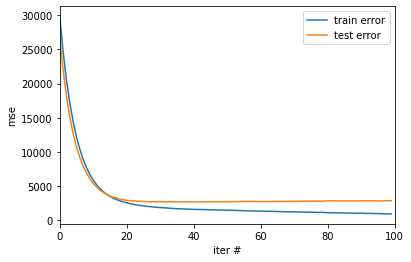

In [0]:
n_trees = 100
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)

error @train for the model with trees = 100, depth = 3         step = 0.01 equal to: 6240.09777115577
error @test for the model with trees = 100, depth = 3         step = 0.01 equal to: 5655.848097340971


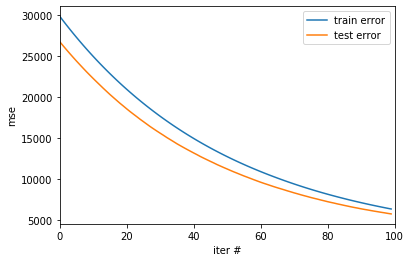

In [0]:
n_trees = 100
coefs = [1] * n_trees
max_depth = 3
eta = 0.01

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)

error @train for the model with trees = 100, depth = 5         step = 0.1 equal to: 92.23001015511237
error @test for the model with trees = 100, depth = 5         step = 0.1 equal to: 3247.7675912293803


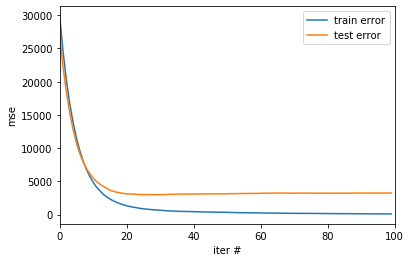

In [0]:
n_trees = 100
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)

# adam

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

## functions 

In [0]:
# accuracy function
def get_error(y_pred, y_true):
    return sum(y_pred != y_true) / len(y)

# adaboost function
def adaboost(x, y, n):
    n_objects = len(x)
    
    # unique classes
    n_classes = len(np.unique(y))

    # initial weights
    w = np.ones(n_objects) / n_objects

    models = []

    for i in range(n):
        clf = DecisionTreeClassifier(max_depth=1)
        clf.fit(x, y, sample_weight=w)

        predictions = clf.predict(x)
        e = get_error(predictions, y)

        # drop the tree if its error > 0.5
        # valid for the non-binary classificators
        if e >= 1 - 1/n_classes:
            break

        # weight for a tree
        alpha = 0.5 * np.log((1 - e) / e)

        # indices of the correct predictions
        match = predictions == y

        # incresing weights for the incorrect predictions
        w[~match] *= np.exp(alpha)

        # normalizing the weights
        w /= w.sum()

        models.append((alpha, clf))

    return models 

# adaboost predict function
def predict(x, models):

    n_classes = 2
    n_objects = len(x)

    # initializing predictions with nulls
    y_pred = np.zeros((n_objects, n_classes))

    for alpha, clf in models:
        prediction = clf.predict(x)
        # every prediction added with alpha with its index
        y_pred[range(n_objects), prediction] += alpha

    # getting indices with the highest weights
    y_pred = np.argmax(y_pred, axis=1)

    return y_pred

# evaluate & plot error for adamax
def get_eval_plot(x_train, x_test, y_train, y_test):
    
    train_errors, test_errors = [], []
    for n in range(1, 31):
        mods = adaboost(x_train, y_train, n)
        train_errors.append(get_error(predict(x_train, mods), y_train))
        test_errors.append(get_error(predict(x_test, mods), y_test))

    x = list(range(1, 31))
    plt.xlim(0, 30)
    plt.xlabel('n')
    plt.ylabel('accuracy')
    plt.plot(x, train_errors, label='train error')
    plt.plot(x, test_errors, label='test error')
    plt.legend(loc='upper right')
    plt.show()

## data upload

In [0]:
x, y = load_breast_cancer(return_X_y=True)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## build & predict

accuracy @train: 99.649
accuracy @test: 99.121


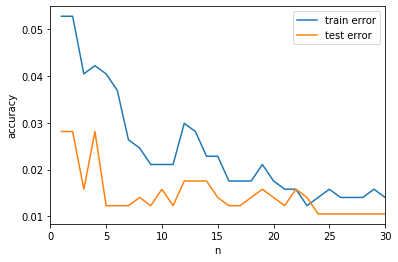

In [0]:
models = adaboost(x_train, y_train, 50)

print(f'accuracy @train: {(1 - get_error(predict(x_train, models), y_train)) * 100:.3f}')
print(f'accuracy @test: {(1 - get_error(predict(x_test, models), y_test)) * 100:.3f}')

get_eval_plot(x_train, x_test, y_train, y_test)

# 1
Для реализованной модели построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [0]:
# для gradient boosting

max_depth = 5
eta = 0.1

n_trees = [i for i in range(1, 58, 3)]
    

# evaluating model
def evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta):

    train_prediction = gb_predict(x_train, trees, coefs, eta)

    print(
        f'error @train for the model with trees = {n}, depth = {max_depth} \
        step = {eta} equal to: {mse(y_train, train_prediction)}'
    )

    test_prediction = gb_predict(x_test, trees, coefs, eta)

    print(
        f'error @test for the model with trees = {n}, depth = {max_depth} \
        step = {eta} equal to: {mse(y_test, test_prediction)}'
    )

    return ([mse(y_train, train_prediction), mse(y_test, test_prediction)])

history = []

for n in n_trees:

    coefs = [1] * n

    trees, train_errors, test_errors = gb_fit(
        n, max_depth, x_train, y_train, x_test, y_test, coefs, eta
    )
    
    history.append(evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta))

error @train for the model with trees = 1, depth = 5         step = 0.1 equal to: 22608.694856135866
error @test for the model with trees = 1, depth = 5         step = 0.1 equal to: 28287.741488210275
error @train for the model with trees = 4, depth = 5         step = 0.1 equal to: 12723.357707885882
error @test for the model with trees = 4, depth = 5         step = 0.1 equal to: 17648.139392785804
error @train for the model with trees = 7, depth = 5         step = 0.1 equal to: 7395.714385679719
error @test for the model with trees = 7, depth = 5         step = 0.1 equal to: 11819.135314550373
error @train for the model with trees = 10, depth = 5         step = 0.1 equal to: 4468.804993114616
error @test for the model with trees = 10, depth = 5         step = 0.1 equal to: 8377.622924370178
error @train for the model with trees = 13, depth = 5         step = 0.1 equal to: 2834.743243483522
error @test for the model with trees = 13, depth = 5         step = 0.1 equal to: 6565.572537077

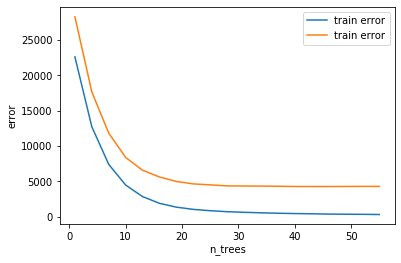

In [0]:
plt.xlabel('n_trees')
plt.ylabel('error')
plt.plot(n_trees, [i[0] for i in history], label='train error')
plt.plot(n_trees, [i[1] for i in history], label='train error')
plt.legend(loc='upper right')
plt.show()

[[[0.05272407732864675, 0.028119507908611598]], [[0.0421792618629174, 0.028119507908611598]], [[0.026362038664323375, 0.012302284710017574]], [[0.0210896309314587, 0.015817223198594025]], [[0.028119507908611598, 0.01757469244288225]], [[0.01757469244288225, 0.012302284710017574]], [[0.0210896309314587, 0.015817223198594025]], [[0.015817223198594025, 0.015817223198594025]], [[0.015817223198594025, 0.01054481546572935]], [[0.014059753954305799, 0.01054481546572935]], [[0.014059753954305799, 0.012302284710017574]], [[0.014059753954305799, 0.01054481546572935]], [[0.008787346221441126, 0.01054481546572935]], [[0.007029876977152899, 0.01054481546572935]], [[0.005272407732864675, 0.01054481546572935]], [[0.005272407732864675, 0.01054481546572935]], [[0.005272407732864675, 0.008787346221441126]], [[0.0017574692442882249, 0.008787346221441126]], [[0.0017574692442882249, 0.008787346221441126]]]


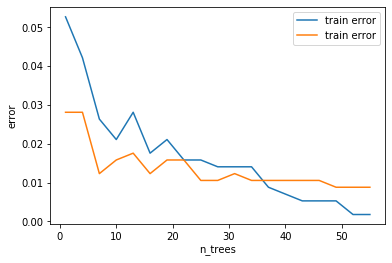

In [0]:
# для adamax

history = []

def get_eval(x_train, x_test, y_train, y_test):
       
    for n in range(1, 58, 3):
        mods = adaboost(x_train, y_train, n)
        history.append([get_error(predict(x_train, mods), y_train), 
                       get_error(predict(x_test, mods), y_test)])

get_eval(x_train, x_test, y_train, y_test)

print([history])

plt.xlabel('n_trees')
plt.ylabel('error')
plt.plot(n_trees, [i[0] for i in history], label='train error')
plt.plot(n_trees, [i[1] for i in history], label='train error')
plt.legend(loc='upper right')
plt.show()


# 2.
Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

не было времени погрузиться в тему, но насколько я понял, отличие стохастического в том, что он при первой раздаче весов берет только часть подвыборки, что я и реализовал ниже

берет случайным образом

сначала на размере квадр корня от выборки, потом на 50% (где то вычитал рекомендацию)

результат похуже на тесте, но не разительно

время на засекал

error @train for the model with trees = 100, depth = 3         step = 0.1 equal to: 902.9518031136525
error @test for the model with trees = 100, depth = 3         step = 0.1 equal to: 3577.0960536374196


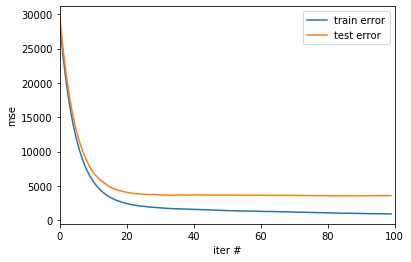

In [0]:
# shuffling with sqrt len of the sample 

def shuffling(x, share):
    np.random.shuffle(x)
    sample1 = x[:int(round(x_train.shape[0] * share,0)), :]

    return sample1

def gb_fit(n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta):

    trees, train_errors, test_errors = [], [], []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            subs = shuffling(
                np.column_stack((x_train, y_train)), 
                int(round(np.sqrt(x_train.shape[0])))
            )
            tree.fit(subs[:, :-1], subs[:, -1])
            train_errors.append(mse(y_train, gb_predict(x_train, trees, coefs, eta)))
            test_errors.append(mse(y_test, gb_predict(x_test, trees, coefs, eta)))

        else:
            target = gb_predict(x_train, trees, coefs, eta)
            tree.fit(x_train, bias(y_train, target))
            
            train_errors.append(mse(y_train, gb_predict(x_train, trees, coefs, eta)))
            test_errors.append(mse(y_test, gb_predict(x_test, trees, coefs, eta)))

        trees.append(tree)

    return trees, train_errors, test_errors

n_trees = 100
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)

error @train for the model with trees = 100, depth = 3         step = 0.1 equal to: 927.2784708491156
error @test for the model with trees = 100, depth = 3         step = 0.1 equal to: 3424.9923464708377


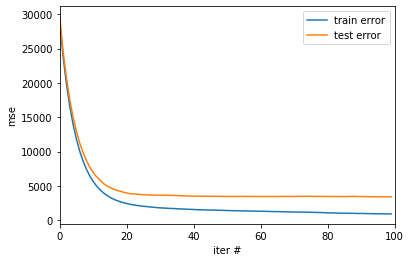

In [0]:
# shuffling with 0.5 of len of the sample 

def gb_fit(n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta):

    trees, train_errors, test_errors = [], [], []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            subs = shuffling(
                np.column_stack((x_train, y_train)), 
                0.5
            )
            tree.fit(subs[:, :-1], subs[:, -1])
            train_errors.append(mse(y_train, gb_predict(x_train, trees, coefs, eta)))
            test_errors.append(mse(y_test, gb_predict(x_test, trees, coefs, eta)))

        else:
            target = gb_predict(x_train, trees, coefs, eta)
            tree.fit(x_train, bias(y_train, target))
            
            train_errors.append(mse(y_train, gb_predict(x_train, trees, coefs, eta)))
            test_errors.append(mse(y_test, gb_predict(x_test, trees, coefs, eta)))

        trees.append(tree)

    return trees, train_errors, test_errors

n_trees = 100
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

trees, train_errors, test_errors = gb_fit(
    n_trees, max_depth, x_train, y_train, x_test, y_test, coefs, eta
)

evaluate_alg(x_train, x_test, y_train, y_test, trees, coefs, eta)

get_error_plot(n_trees, train_errors, test_errors)